# Rete con dataset MNIST per il riconoscimento delle cifre

Import delle librerie necessarie

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from IPython.display import HTML, display
import base64
import io
from PIL import Image
from google.colab import output

Caricamento del dataset e normalizzazione delle immagini

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Adattamento delle dimensioni (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Definizione e compilazione del modello di rete neurale

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Addestramento e valutazione della precisione del modello

In [4]:
batch_size = 128
epochs = 15
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7508 - loss: 0.7904 - val_accuracy: 0.9777 - val_loss: 0.0844
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9622 - loss: 0.1249 - val_accuracy: 0.9838 - val_loss: 0.0616
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9721 - loss: 0.0904 - val_accuracy: 0.9862 - val_loss: 0.0515
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9782 - loss: 0.0713 - val_accuracy: 0.9887 - val_loss: 0.0426
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9799 - loss: 0.0614 - val_accuracy: 0.9868 - val_loss: 0.0438
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9828 - loss: 0.0537 - val_accuracy: 0.9883 - val_loss: 0.0419
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9841 - loss: 0.0494 - val_accuracy: 0.9902 - val_loss: 0.0347
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9833 - loss: 0.0521 - val_accuracy: 0

Visualizzazione grafico di addestramento e test

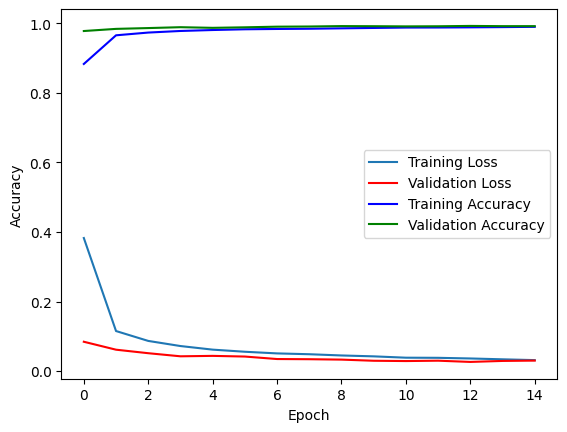

In [5]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Esempio di predizione

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


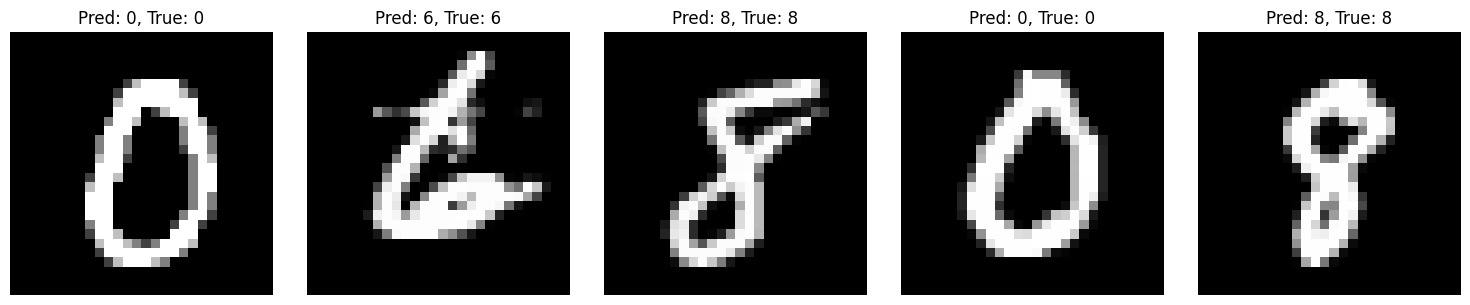

In [6]:
def plot_examples(images, predictions, true_labels, num_examples=5):
    """
    Plots sample images with their predicted and true labels.

    Args:
        images: Array delle immagini di test.
        predictions: Array delle labels predette.
        true_labels: Array delle labels vere per le immagini.
        num_examples: numero di esempi da plottare
    """
    plt.figure(figsize=(15, 3)) # Regola le dimensioni della figura per una singola riga
    for i in range(min(num_examples, 5)): # Assicura di non superare 5 esempi per questa configurazione
        plt.subplot(1, 5, i + 1) # Modificato il grid per una singola riga con 5 colonne
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        predicted_label = np.argmax(predictions[i])
        true_label = np.argmax(true_labels[i])
        plt.title(f"Pred: {predicted_label}, True: {true_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


num_examples_to_show = 5 # Impostato a 5 per visualizzare 5 esempi
random_indices = np.random.choice(x_test.shape[0], num_examples_to_show)
sample_images = x_test[random_indices]
sample_true_labels = y_test[random_indices]

sample_predictions = model.predict(sample_images)

plot_examples(sample_images, sample_predictions, sample_true_labels, num_examples=num_examples_to_show)

Canvas per disegnare e sottoporre al modello una cifra per riconoscimento

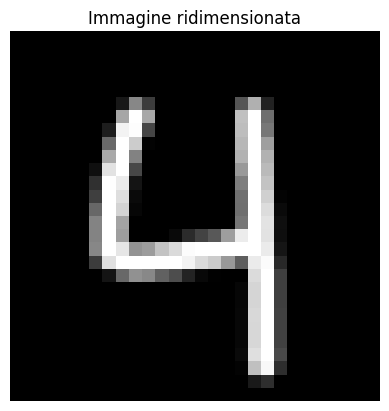

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


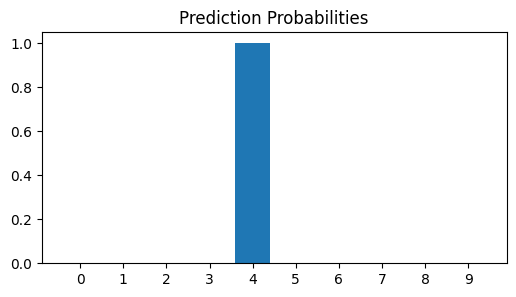

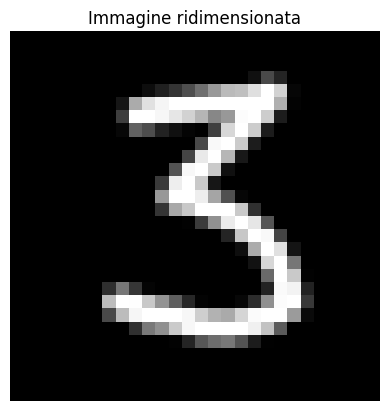

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


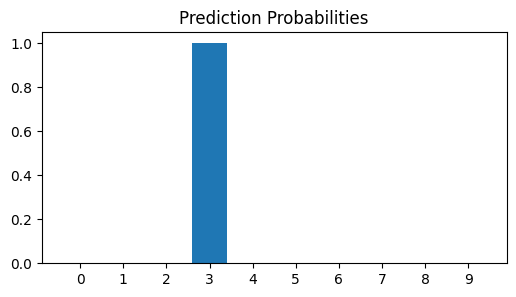

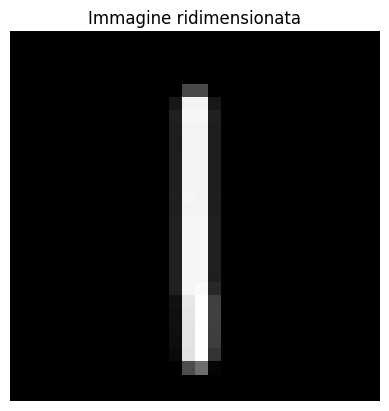

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


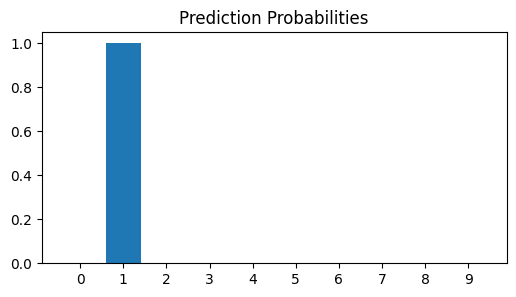

In [7]:
canvas_html = """
<div style="text-align:center">
<canvas id="canvas" width="200" height="200" style="border:1px solid black; background:black;"></canvas>
<br/>
<button onclick="predict()">Predict</button>
<button onclick="clearCanvas()">Clear</button>
</div>
<script>
var canvas = document.getElementById('canvas');
var ctx = canvas.getContext('2d');
var drawing = false;
var lastX = 0;
var lastY = 0;

ctx.lineWidth = 15;
ctx.lineJoin = 'round';
ctx.lineCap = 'round';

ctx.fillStyle = "black"; // Set fill style to black for clearing
ctx.fillRect(0, 0, canvas.width, canvas.height); // Fill canvas with black initially
ctx.strokeStyle = "white"; // Set stroke style to white for drawing

function startDrawing(e) {
    drawing = true;
    [lastX, lastY] = [e.offsetX, e.offsetY];
}

function draw(e) {
    if (!drawing) return;
    ctx.beginPath();
    ctx.moveTo(lastX, lastY);
    ctx.lineTo(e.offsetX, e.offsetY);
    ctx.stroke();
    [lastX, lastY] = [e.offsetX, e.offsetY];
}

function stopDrawing() {
    drawing = false;
}

canvas.addEventListener('mousedown', startDrawing);
canvas.addEventListener('mousemove', draw);
canvas.addEventListener('mouseup', stopDrawing);
canvas.addEventListener('mouseout', stopDrawing);

function clearCanvas() {
    ctx.fillStyle = "black";
    ctx.fillRect(0, 0, canvas.width, canvas.height);
    ctx.fillStyle = "white";
    ctx.strokeStyle = "white";
}

function predict() {
    var data = canvas.toDataURL('image/png');
    google.colab.kernel.invokeFunction('notebook.predict_digit', [data], {});
}
</script>
"""

display(HTML(canvas_html))

def preprocess_image(img):
    img = img.convert('L') # Converte in scala di grigi
    img_array = np.array(img)

    # Mantieni l'immagine originale (dopo la conversione in scala di grigi)
    new_img = Image.fromarray(img_array)

    # Ridimensiona l'immagine direttamente a 28x28 senza ritaglio o centratura basata sul contenuto
    new_img = new_img.resize((28, 28))

    plt.imshow(new_img, cmap='gray')
    plt.title('Immagine ridimensionata')
    plt.axis('off')
    plt.show()

    img_array = np.array(new_img)
    img_array = img_array.astype('float32') / 255.0
    img_array = np.expand_dims(img_array, -1)

    return np.expand_dims(img_array, 0)

def predict_digit(data):
    data = data.split(',')[1]
    binary = base64.b64decode(data)
    img = Image.open(io.BytesIO(binary))
    processed_img = preprocess_image(img)
    prediction = model.predict(processed_img)
    digit = np.argmax(prediction)
    confidence = np.max(prediction)
    display(HTML(f"<h2>Predicted: {digit} (Confidence: {confidence:.2%})</h2>"))
    plt.figure(figsize=(6,3))
    plt.bar(range(10), prediction[0])
    plt.xticks(range(10))
    plt.title('Prediction Probabilities')
    plt.show()

output.register_callback('notebook.predict_digit', predict_digit)
